# Hypothesis testing 
test statistic=(observed value-expected value)/standard error

In [34]:
# load packages import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib .axes as ax
import matplotlib as mpl
%matplotlib inline


In [13]:
#hypothesis  testing -difference of means (given two samples of data)
sample_mean_g=123.5
sample_sd_g=np.sqrt(98)
n_g=60

sample_mean_b=126.2
sample_sd_b=np.sqrt(120)
n_b=50

In [9]:
sample_height_g=np.random.normal(loc=sample_mean_g, scale=sample_sd_g, size=n_g)
print("Observation",len(sample_height_g))
print(sample_height_g[:5])
print("Mean",np.mean(sample_height_g))
print("standard deviation",np.std(sample_height_g))
print("Variance",np.std(sample_height_g)**2)

Observation 60
[124.53439899 134.06226483 125.149944   110.79211443 132.27767418]
Mean 123.04647574706512
standard deviation 8.546771323899701
Variance 73.04730006303426


In [14]:
sample_height_b=np.random.normal(loc=sample_mean_b, scale=sample_sd_b, size=n_b)
print("Observation",len(sample_height_b))
print(sample_height_b[:5])
print("Mean",np.mean(sample_height_b))
print("standard deviation",np.std(sample_height_b))
print("Variance",np.std(sample_height_b)**2)

Observation 50
[123.3490459  135.05990552 121.12277726 131.56039566 131.10315708]
Mean 128.9008821013645
standard deviation 12.555815585875147
Variance 157.64850502650526


In [21]:
obs_diff=sample_mean_g-sample_mean_b
print(obs_diff)

exp_diff=0

vng=(sample_sd_g)**2/n_g
vnb=(sample_sd_b)**2/n_b
std_err=np.sqrt(vng+vnb)

print("sample difference",obs_diff)
print("Expected population difference",exp_diff)
print("standard Error",std_err)

-2.700000000000003
sample difference -2.700000000000003
Expected population difference 0
standard Error 2.008316044185609


In [22]:
z=(obs_diff-exp_diff)/std_err
print("z-score",z)

z-score -1.3444099138763181


Fail to rejcet the null hypothesis because it lies in the the non-rejection range  (-1.96< Z < 1.96)

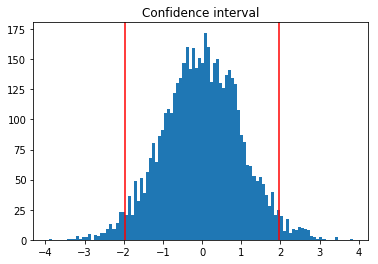

In [33]:
#plotting the standard normal curve 

stdn_data=np.random.randn(5000)

stdn=plt.figure()
#add lines to show 95% confidence level
plt.hist(stdn_data, bins=100)
plt.axvline(x=-1.96,color='r')
plt.axvline(x=1.96,color='r')
plt.title("Confidence interval")
plt.show()
stdn.savefig("standard_normal.png")

# Linear Regression 
x axis -independent variable

y axis - dependent variable 


In [37]:
import statsmodels.formula.api as smf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib .axes as ax
import matplotlib as mpl
%matplotlib inline

demo =pd.read_csv("county_demographics_2016.csv")
demo.head()
# check outside kick learn for making regression 

,fips,adult_pop,female_pop,male_pop,median_age,population,pct_poverty,median_income,pct_highschool,pct_unemployed
0,1001,41890.0,28422.0,26994.0,38.6,55416.0,13.5,54487.0,87.6,3.4
1,1003,163233.0,107322.0,101241.0,42.9,208563.0,11.7,56460.0,90.0,3.7
2,1005,20477.0,12186.0,13779.0,40.1,25965.0,29.9,32884.0,73.8,6.2
3,1007,17944.0,10498.0,12145.0,39.6,22643.0,20.1,43079.0,80.7,3.5
4,1009,44322.0,29206.0,28498.0,41.1,57704.0,14.1,47213.0,80.0,3.0


Text(0,0.5,'Median Income')

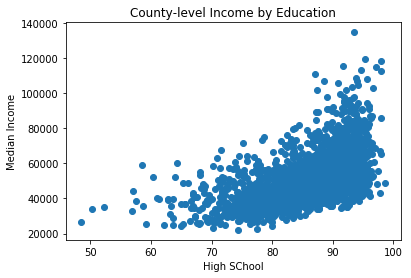

In [57]:
inc_educ=plt.figure()
plt.scatter(demo['pct_highschool'],demo['median_income'])
plt.title("County-level Income by Education")
plt.xlabel("High SChool")
plt.ylabel("Median Income")

Text(0,0.5,'Median Income')

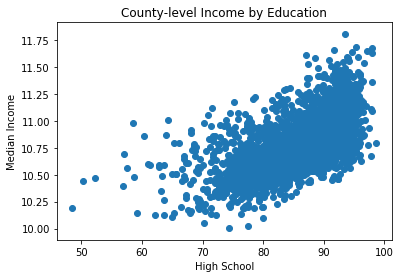

In [59]:
# trying to fit the data in a straight line by taking the natural log of median income 
inc_educ=plt.figure()
plt.scatter(demo['pct_highschool'],np.log(demo['median_income']))
plt.title("County-level Income by Education")
plt.xlabel("High School")
plt.ylabel("Median Income")

In [54]:
demo=  demo[['pct_highschool', 'median_income']].dropna()
demo.head()

,pct_highschool,median_income
0,87.6,54487.0
1,90.0,56460.0
2,73.8,32884.0
3,80.7,43079.0
4,80.0,47213.0


In [56]:
model=smf.ols(formula='np.log(median_income) ~ pct_highschool',data=demo)
est=model.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(median_income)   R-squared:                       0.371
Model:                               OLS   Adj. R-squared:                  0.371
Method:                    Least Squares   F-statistic:                     1852.
Date:                   Wed, 06 Jun 2018   Prob (F-statistic):          2.20e-318
Time:                           11:42:46   Log-Likelihood:                 720.56
No. Observations:                   3140   AIC:                            -1437.
Df Residuals:                       3138   BIC:                            -1425.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8415      0.045    195.703      0.000       8.753       8.930
pct_highschool     0.0226      0.001     43.031      0.000       0.022       0.024
==============================================================================
Omnibus:                      310.224   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.689
Skew:                           0.769   Prob(JB):                     1.23e-96
Kurtosis:                       4.006   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""